In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
print(plt.style.available)
# plt.style.use('seaborn-pastel')
plt.style.use('seaborn-notebook')
# plt.style.use('classic')
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


# 1) Import data

In [40]:
test = pd.read_csv('test.csv', index_col='RefId')
training = pd.read_csv('training.csv', index_col='RefId')

In [41]:
training.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
RefId,,,,,,,,,,,,,,,,,,,,,
1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [42]:
print training.columns

Index([u'IsBadBuy', u'PurchDate', u'Auction', u'VehYear', u'VehicleAge',
       u'Make', u'Model', u'Trim', u'SubModel', u'Color', u'Transmission',
       u'WheelTypeID', u'WheelType', u'VehOdo', u'Nationality', u'Size',
       u'TopThreeAmericanName', u'MMRAcquisitionAuctionAveragePrice',
       u'MMRAcquisitionAuctionCleanPrice', u'MMRAcquisitionRetailAveragePrice',
       u'MMRAcquisitonRetailCleanPrice', u'MMRCurrentAuctionAveragePrice',
       u'MMRCurrentAuctionCleanPrice', u'MMRCurrentRetailAveragePrice',
       u'MMRCurrentRetailCleanPrice', u'PRIMEUNIT', u'AUCGUART', u'BYRNO',
       u'VNZIP1', u'VNST', u'VehBCost', u'IsOnlineSale', u'WarrantyCost'],
      dtype='object')


# 2) Define data types

Based on the info given by Carvana_Data_Dictionary.txt, we can separate different type of features

## 2.1) External info

### Data types

- **IDs**:
    - RefID				    Unique (sequential) number assigned to vehicles
    - BYRNO					Unique number assigned to the buyer that purchased the vehicle


- **Target**:
    - IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 


- **Time information**:
    - PurchDate				The Date the vehicle was Purchased at Auction
    // VehYear & year are redundant we keep Age
    - VehYear				The manufacturer's year of the vehicle
    - VehicleAge			The Years elapsed since the manufacturer's year
  
  
- **Categorical**:
    - Auction				Auction provider at which the  vehicle was purchased
    - Make					Vehicle Manufacturer
    - Model					Vehicle Model
    - SubModel				Vehicle Submodel
    - Color					Vehicle Color
    - Transmission			Vehicles transmission type (Automatic, Manual)
    - WheelTypeID			The type id of the vehicle wheel
    - WheelType				The vehicle wheel type description (Alloy, Covers)
    //wheeType and wheeltypeID are redundant
    - Nationality			The Manufacturer's country
    - TopThreeAmericanName	Identifies if the manufacturer is one of the top three American manufacturers
    // acquisition type doesn't seem to be in the data
    - AcquisitionType	Identifies how the vehicle was aquired (Auction buy, trade in, etc)
    - VNZIP             Zipcode where the car was purchased
    - VNST              State where the the car was purchased


- **Binary Category**:
    - PRIMEUNIT			Identifies if the vehicle would have a higher demand than a standard purchase
    - IsOnlineSale		Identifies if the vehicle was originally purchased online

    
- **Ordinal**:
    - Trim				Vehicle Trim Level
    - Size				The size category of the vehicle (Compact, SUV, etc.)
    - AUCGUART			The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)


- **Interval**
    - VehOdo			The vehicles odometer reading
    - MMRAcquisitionAuctionAveragePrice	Acquisition price for this vehicle in average condition at time of purchase
    - MMRAcquisitionAuctionCleanPrice		Acquisition price for this vehicle in the above Average condition at time of purchase
    - MMRAcquisitionRetailAveragePrice	Acquisition price for this vehicle in the retail market in average condition at time of purchase
    - MMRAcquisitonRetailCleanPrice		Acquisition price for this vehicle in the retail market in above average condition at time of purchase
    - MMRCurrentAuctionAveragePrice		Acquisition price for this vehicle in average condition as of current day	
    - MMRCurrentAuctionCleanPrice		Acquisition price for this vehicle in the above condition as of current day
    - MMRCurrentRetailAveragePrice		Acquisition price for this vehicle in the retail market in average condition as of current day
    - MMRCurrentRetailCleanPrice		Acquisition price for this vehicle in the retail market in above average condition as of current day
    - VehBCost				Acquisition cost paid for the vehicle at time of purchase
    - WarrantyCost                            Warranty price (term=36month  and millage=36K)
    // we consider vehicle age here
    - VehicleAge			The Years elapsed since the manufacturer's year


## 2.2) Define timed type

In [43]:
training['PurchDate'] = pd.to_datetime(training['PurchDate'])
dates = ['PurchDate', 'VehicleAge']

In [44]:
training[dates].head()

,PurchDate,VehicleAge
RefId,,
1,2009-12-07,3
2,2009-12-07,5
3,2009-12-07,4
4,2009-12-07,5
5,2009-12-07,4


## 2.3) Define category type

In [45]:
training.IsBadBuy = training.IsBadBuy.astype('category')

In [46]:
categories = ['Auction', 'Make', 'Model', 'SubModel', 'Color','Transmission',\
              'WheelType', 'Nationality', 'TopThreeAmericanName',\
              'VNZIP1','VNST', 'PRIMEUNIT', 'IsOnlineSale']

for cat in categories:
    training[cat] = training[cat].astype('category')

training[categories].head()

,Auction,Make,Model,SubModel,Color,Transmission,WheelType,Nationality,TopThreeAmericanName,VNZIP1,VNST,PRIMEUNIT,IsOnlineSale
RefId,,,,,,,,,,,,,
1,ADESA,MAZDA,MAZDA3,4D SEDAN I,RED,AUTO,Alloy,OTHER ASIAN,OTHER,33619,FL,NaN,0
2,ADESA,DODGE,1500 RAM PICKUP 2WD,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,AMERICAN,CHRYSLER,33619,FL,NaN,0
3,ADESA,DODGE,STRATUS V6,4D SEDAN SXT FFV,MAROON,AUTO,Covers,AMERICAN,CHRYSLER,33619,FL,NaN,0
4,ADESA,DODGE,NEON,4D SEDAN,SILVER,AUTO,Alloy,AMERICAN,CHRYSLER,33619,FL,NaN,0
5,ADESA,FORD,FOCUS,2D COUPE ZX3,SILVER,MANUAL,Covers,AMERICAN,FORD,33619,FL,NaN,0


In [47]:
ordinal = ['Trim', 'Size', 'AUCGUART']
# for cat in categories:
#     training[cat] = training[cat].astype('category')

training[ordinal].head()

,Trim,Size,AUCGUART
RefId,,,
1,i,MEDIUM,NaN
2,ST,LARGE TRUCK,NaN
3,SXT,MEDIUM,NaN
4,SXT,COMPACT,NaN
5,ZX3,COMPACT,NaN


## 2.4) Define interval type

In [48]:
interval = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',\
           'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',\
            'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',\
            'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
            'VehBCost','WarrantyCost', 'VehicleAge'
           ]
training[interval].head()

,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,VehicleAge
RefId,,,,,,,,,,,,
1,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,7100.0,1113,3
2,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,7600.0,1053,5
3,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,4900.0,1389,4
4,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,4100.0,630,5
5,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,4000.0,1020,4


# 3) Exploratory Analysis

In [49]:
training.describe()

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VehBCost,WarrantyCost
count,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000
mean,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,6730.934326,1276.580985
std,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,1767.846435,598.846788
min,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,1.000000,462.000000
25%,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,5435.000000,837.000000
50%,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,6700.000000,1155.000000
75%,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,7900.000000,1623.000000
max,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,45469.000000,7498.000000


### % of bad buy:

- Proportion of bad buy is ~12 %

0    64007
1     8976
Name: IsBadBuy, dtype: int64
% bad buy: 0.122987545045


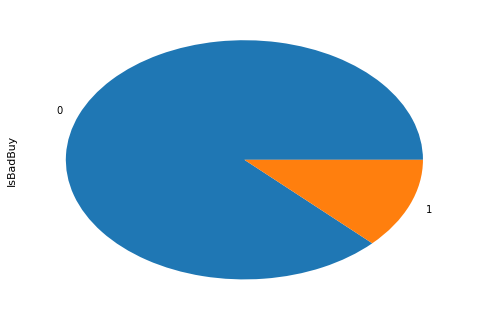

In [50]:
print training.IsBadBuy.value_counts()
training.IsBadBuy.value_counts().plot(kind='pie')
print "% bad buy:", (8976.)/(64007+8976)

In [51]:
groupby_kicked = training.groupby(training.IsBadBuy)
print groupby_kicked['Make'].describe()
print groupby_kicked['VNST'].describe()

IsBadBuy        
0         count         64007
          unique           33
          top       CHEVROLET
          freq          15567
1         count          8976
          unique           30
          top            FORD
          freq           1742
Name: Make, dtype: object
IsBadBuy        
0         count     64007
          unique       37
          top          TX
          freq      11719
1         count      8976
          unique       36
          top          TX
          freq       1877
Name: VNST, dtype: object


### NaN Analysis
- 95% of PRIMEUNIT and AUCGUART is NaN

In [52]:
training.isnull().sum()/len(training)

IsBadBuy                             0.000000
PurchDate                            0.000000
Auction                              0.000000
VehYear                              0.000000
VehicleAge                           0.000000
Make                                 0.000000
Model                                0.000000
Trim                                 0.032336
SubModel                             0.000110
Color                                0.000110
Transmission                         0.000123
WheelTypeID                          0.043421
WheelType                            0.043490
VehOdo                               0.000000
Nationality                          0.000069
Size                                 0.000069
TopThreeAmericanName                 0.000069
MMRAcquisitionAuctionAveragePrice    0.000247
MMRAcquisitionAuctionCleanPrice      0.000247
MMRAcquisitionRetailAveragePrice     0.000247
MMRAcquisitonRetailCleanPrice        0.000247
MMRCurrentAuctionAveragePrice     

- We drop NaN in continuous IV

In [53]:
training = training.dropna(subset=['MMRCurrentAuctionAveragePrice'])

### Cross tabulations
- Cross-tabulation to try to get an intuition of how distribution of categories impact the outcome

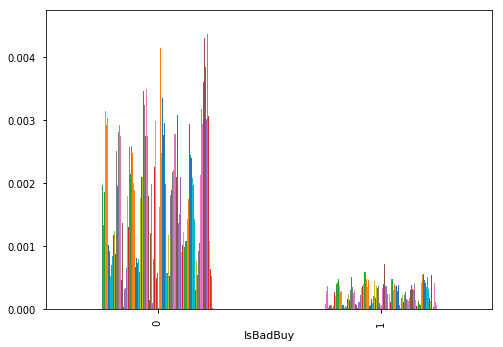

In [54]:
ct = pd.crosstab(training.IsBadBuy, training.PurchDate, normalize=True)
ct.plot.bar(legend=False)

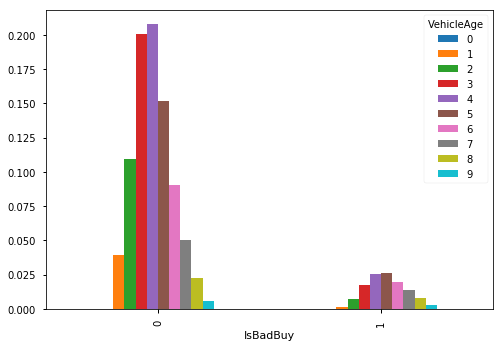

In [55]:
ct = pd.crosstab(training.IsBadBuy, training.VehicleAge, normalize=True)
ct.plot.bar()

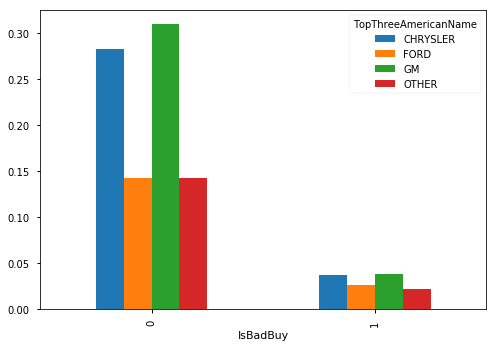

In [56]:
ct = pd.crosstab(training.IsBadBuy, training.TopThreeAmericanName, normalize=True)
ct.plot.bar()

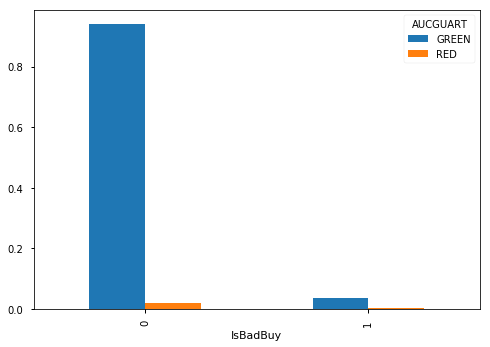

In [57]:
ct = pd.crosstab(training.IsBadBuy, training.AUCGUART,normalize=True)
ct.plot.bar()

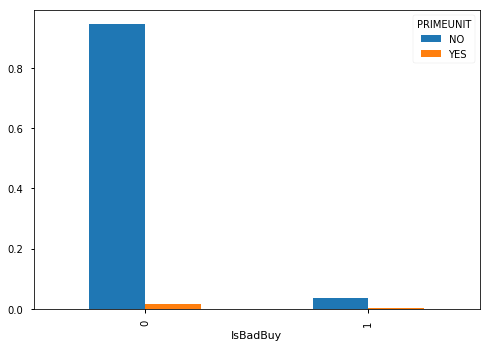

In [58]:
ct = pd.crosstab(training.IsBadBuy, training.PRIMEUNIT,normalize=True)
ct.plot.bar()

- Looks like Trim is informative. its distributio varies for isbadbuy True vs. False

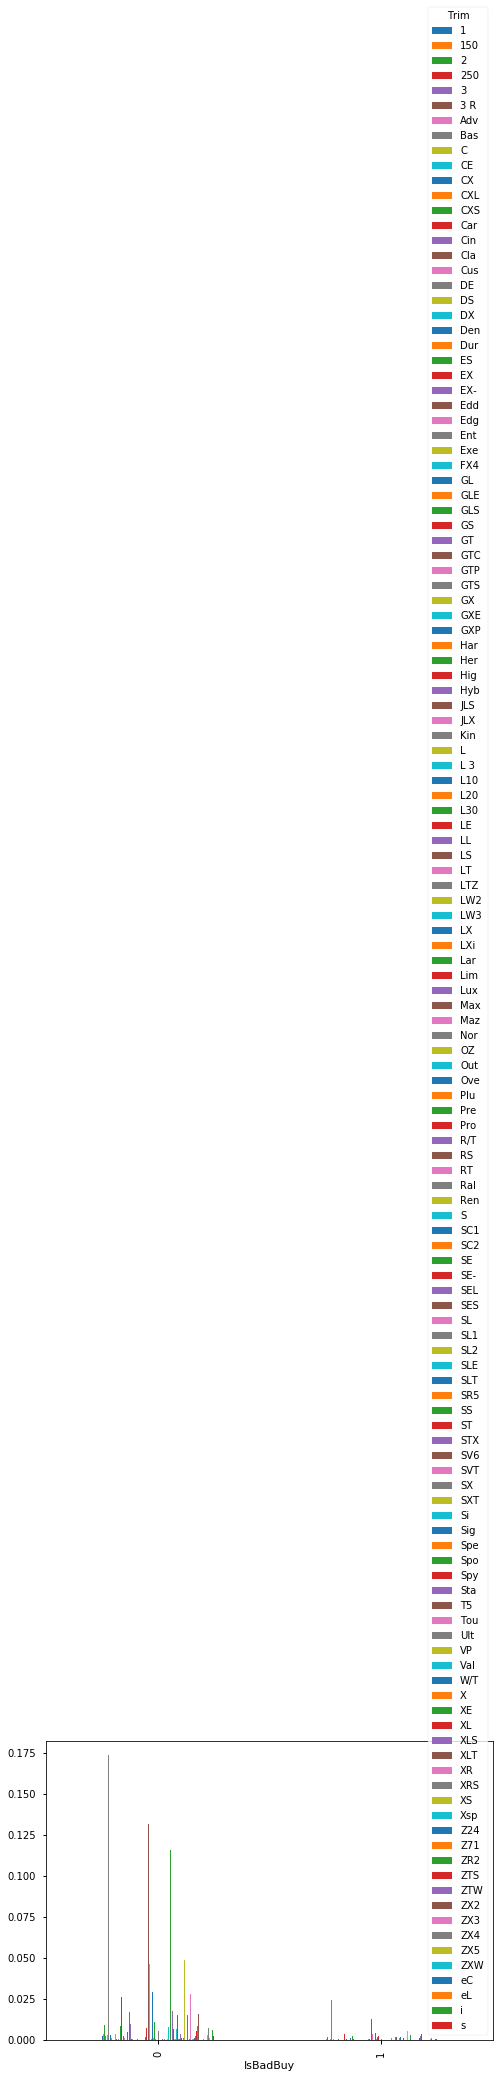

In [59]:
ct = pd.crosstab(training.IsBadBuy, training.Trim, normalize=True)
ct.plot.bar()

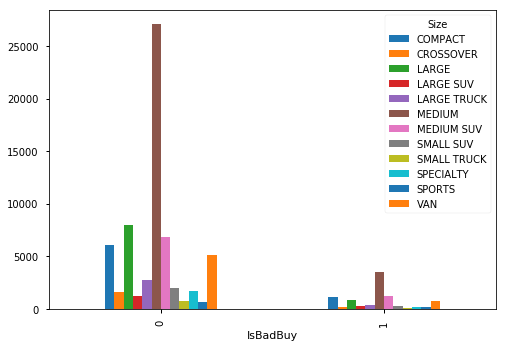

In [60]:
ct = pd.crosstab(training.IsBadBuy, training.Size)
ct.plot.bar()

### Categorical feature selection

- based on previous exploratory analysis and intuition, we pick a subset of categorical features

In [61]:
category_selection = ['Auction', 'Make', 'Model', 'SubModel', 'Transmission',\
              'WheelType', 'Nationality', 'TopThreeAmericanName',\
              'VNST', 'PRIMEUNIT', 'IsOnlineSale','Trim', 'Size']

In [62]:
# multicolinearity analysis requires too much processing
# import mca
# toto = training[category_selection]
# toto_ = pd.get_dummies(toto)
# mca_ben = mca.mca(toto_)

## Correlation of continous variables
- it looks like MMR continuous features are somewhat correlated we probably won't need all of them

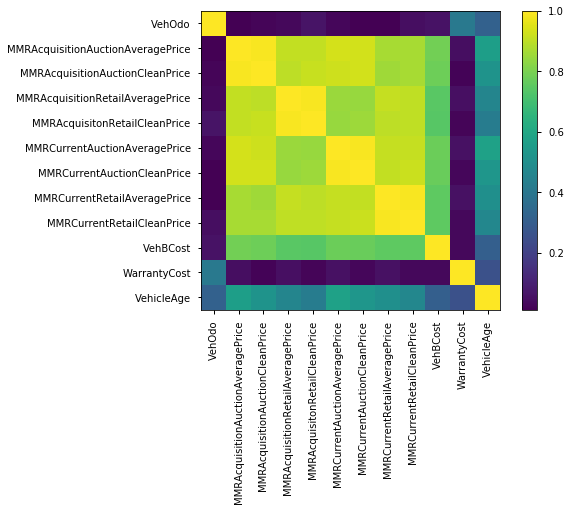

In [63]:
plt.imshow(abs(training[interval].corr()) , interpolation='nearest');
ax = plt.axes()
plt.colorbar()
#ax.set_xticks(range(len(df.corr().columns)))
ax.set_xticks(range(len(training.columns)))
ax.set_xticklabels(training[interval].columns, rotation=90)
ax.set_yticks(range(len(training.columns)))
ax.set_yticklabels(training[interval].columns)
plt.plot();

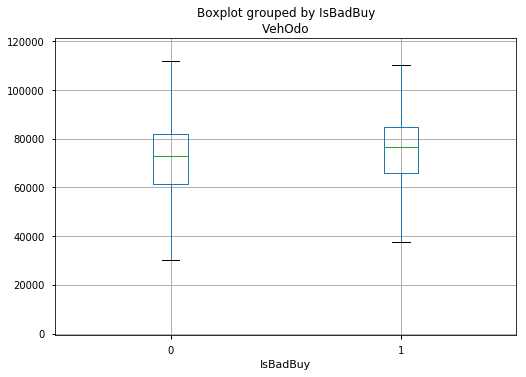

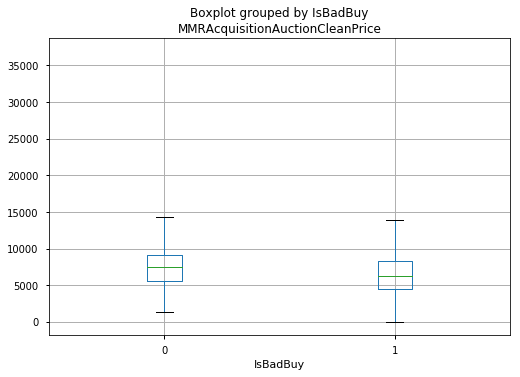

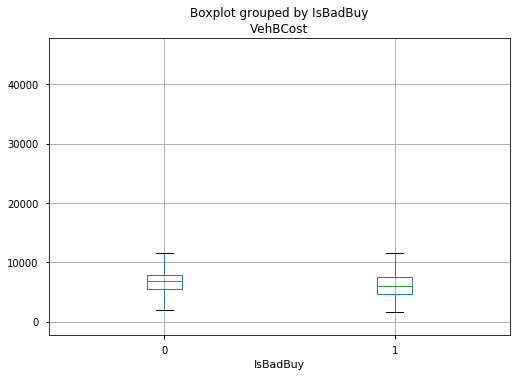

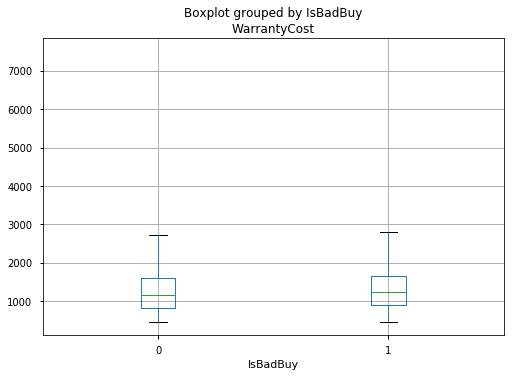

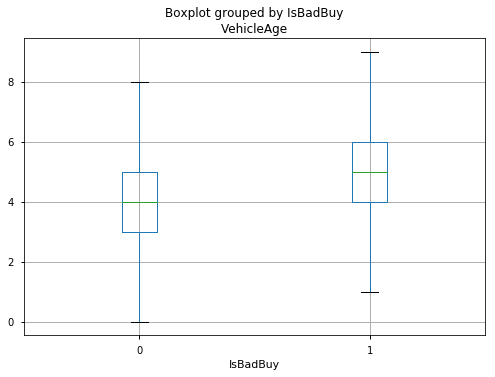

In [64]:
training.boxplot(by='IsBadBuy', column='VehOdo')
training.boxplot(by='IsBadBuy', column='MMRAcquisitionAuctionCleanPrice')
training.boxplot(by='IsBadBuy', column='VehBCost')
training.boxplot(by='IsBadBuy', column='WarrantyCost')
training.boxplot(by='IsBadBuy', column='VehicleAge');

## Continuous feature Selection

- based on previous explorations we hand picked a subset of the continuous features (in the future more formal featue selection might be required)

In [65]:
interval_selection = ['MMRAcquisitionAuctionAveragePrice', 'VehOdo',\
                      'WarrantyCost', 'VehicleAge']

# 4) Data Preprocessing

- we do one hot encoding of categorical variables. increases features space by a lot. will need to do dimension reduction at some point.
- we normalize continuous features

In [66]:
# pick
# X = training[interval_selection+category_selection]
X_interval = training[interval_selection]
X_interval_ = preprocessing.normalize(X_interval)
X_category = training[category_selection]
X_category_ = pd.get_dummies(X_category)
X_ = np.hstack((X_interval_, X_category_))
y = training.IsBadBuy
y_ = y.values.to_dense()

In [67]:
print X_[:5]
print y_[:5]

[[ 0.09119315  0.99575544  0.0124461  ...,  0.          0.          0.        ]
 [ 0.07303179  0.9972665   0.01122009 ...,  0.          0.          0.        ]
 [ 0.04333499  0.99888373  0.01879835 ...,  0.          0.          0.        ]
 [ 0.02883591  0.99953809  0.00959674 ...,  0.          0.          0.        ]
 [ 0.0563145   0.99830516  0.01467948 ...,  0.          0.          0.        ]]
[0 0 0 0 0]


# 5) Modeling

### Logistic regresssion classifier

- we try with a simple model such as logistic regression first

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, stratify = y_)#, random_state=42)
print X_.shape, y_.shape
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(72668, 2167) (72668,)
(58134, 2167) (58134,)
(14534, 2167) (14534,)


- classes are unbalanced so we put add weights that reflects that

In [83]:
lr = linear_model.LogisticRegression(C=1.0, class_weight='balanced', n_jobs =-1)
#lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [74]:
print lr.score(X_train, y_train)
print lr.score(X_test, y_test)

0.757302095159
0.74625017201


In [75]:
print "yo"

yo


# 6) Evaluation

- we want an evaluation that takes into account class imbalance & tradeoff precision/recall e.g. including F1 score 

### Classification report

−−−−−− training set report−−−−−
             precision    recall  f1-score   support

          0       0.94      0.77      0.85     50979
          1       0.29      0.66      0.40      7155

avg / total       0.86      0.76      0.79     58134

−−−−−−− testing set report −−−−−
             precision    recall  f1-score   support

          0       0.93      0.77      0.84     12745
          1       0.27      0.60      0.37      1789

avg / total       0.85      0.75      0.78     14534



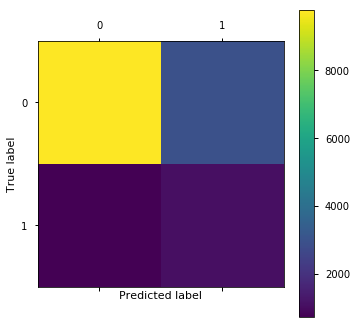

In [84]:
from sklearn import metrics
from scipy.stats import sem
print "−−−−−− training set report−−−−−"
y_pred_train = lr.predict(X_train)
print metrics.classification_report(y_train, y_pred_train)
print "−−−−−−− testing set report −−−−−"
y_pred_test = lr.predict(X_test)
print metrics.classification_report(y_test, y_pred_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.matshow(confusion_matrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()

- Recall is not too bad. Overall we detect a good portion of the bad buys,  but precision for detecting bad buy is small. Too many false positive
- from a business perspective maybe it's not such a bad thing to be conservative (good recall bad precision) and have the cars classified as potential bad buys double checked automatically

### KFold cross-validation, error curves, AUC

In [89]:
# cv = model_selection.KFold(n_splits=3, shuffle=True)
scores = model_selection.cross_val_score(lr, X_train, y_train , cv=3)
print("%d−Fold Cross Validation Accuracy: %0.2f (+/− %0.2f)"%(5,scores.mean() , sem(scores)))
# scores = model_selection.cross_val_score(lr, X_train, y_train, cv=3, scoring='roc_auc')
# print("%d−Fold Cross Validation AUC: %0.2f (+/− %0.2f)"%(5,scores.mean() , sem(scores)))
scores = model_selection.cross_val_score(lr, X_train, y_train, cv=3, scoring='f1_weighted')
print("%d−Fold Cross Validation F1: %0.2f (+/− %0.2f)"%(5,scores.mean() , sem(scores)))

5−Fold Cross Validation Accuracy: 0.74 (+/− 0.00)
5−Fold Cross Validation F1: 0.78 (+/− 0.00)


- we plot error curves to look at bias/variance tradeoff 
- we focus on F1 error measure

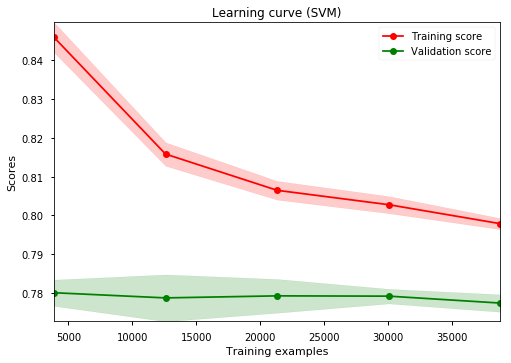

In [88]:
def plotLearningCurve(X_train, y_train, clf):
    plt.figure()
    plt.title ("Learning curve (SVM)")
    plt.xlabel("Training examples")
    plt.ylabel("Scores")
    train_sizes , train_scores , test_scores = model_selection.learning_curve(clf , X_train , y_train , cv=3, scoring='f1_weighted')
    train_scores_mean = np.mean(train_scores , axis=1)
    train_scores_std = np.std(train_scores , axis=1)
    test_scores_mean = np.mean(test_scores , axis=1)
    test_scores_std = np.std(test_scores , axis=1)
    plt.plot(train_sizes, train_scores_mean , 'o-', label="Training score", color="r")
    plt.fill_between(train_sizes , train_scores_mean-train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(train_sizes, test_scores_mean,'o-', label="Validation score",color ="g")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std , test_scores_mean + test_scores_std , alpha=0.2, color="g")
    plt.legend(loc ="best")
    plt.autoscale(tight=True)
    plt.show()
    
plotLearningCurve(X_train, y_train, lr)

- looks like our model has a high bias and adding more data doesn't really help. Next I would maybe look at more complex model such as SVM & grad boosting. and also look at dimension reduction

14534
14534
[ 0.          0.23326795  1.        ] [ 0.          0.60033538  1.        ] [2 1 0]


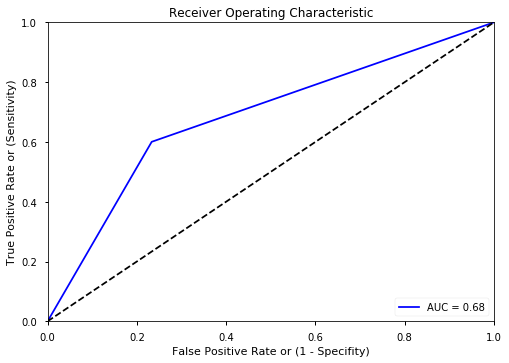

In [90]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_test)

print len(y_test)
print len(y_pred_test)
print fpr, tpr, _

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# 7) Potential next steps

- feature selection / dimension reduction
- hyperparameter optimization (using Gridsearch e.g.)
- complexify the model to reduce bias (SVM, xgboost, ...)
- look at anomaly models
- ...